In [1]:
import re

def parse_line(line, structure):
    # Extract the different categories using regular expressions
    categories = re.findall(r'\[\[.*?\]\]|\[.*?\]', line)
    
    parsed_data = {}
    for i, category in enumerate(categories):
        # Extract the numerical values within each category
        values = re.findall(r'[\d.]+', category)
        # Convert the extracted values to float or int
        parsed_values = [float(value) if '.' in value else int(value) for value in values]
        parsed_data[structure[i]] = parsed_values
    
    return parsed_data

def parse_file(filename, structure):
    parsed_lines = []
    with open(filename, 'r') as file:
        for line in file:
            parsed_line = parse_line(line.strip(), structure)
            parsed_lines.append(parsed_line)
    return parsed_lines

# Define the structure
structure = ['initial_pos', 'target_pos', 'senders_pos', 'times_pos', 'senders_neg', 'times_neg']

# Parse the file
parsed_data = parse_file('dataset_spikes.gdf', structure)

# Print the parsed data
# for data in parsed_data:
#     print(data)

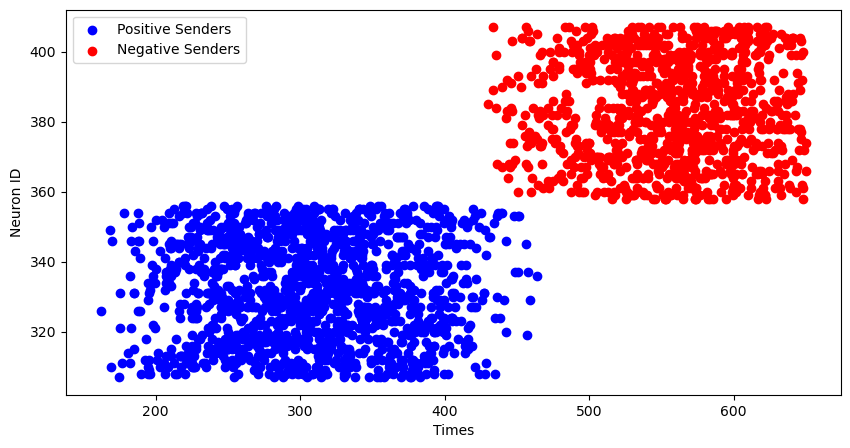

In [2]:
import matplotlib.pyplot as plt

data = parsed_data[10]

# Plot senders_pos against times_pos
plt.figure(figsize=(10, 5))
plt.scatter(data['times_pos'], data['senders_pos'], color='blue', label='Positive Senders')
plt.scatter(data['times_neg'], data['senders_neg'], color='red', label='Negative Senders')
plt.xlabel('Times')
plt.ylabel('Neuron ID')
plt.legend()
plt.show()